In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functools
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Read the Data 

In [2]:
df_prob = pd.read_csv("problem_data.csv")

In [3]:
df_user = pd.read_csv("user_data.csv")

In [4]:
df_train = pd.read_csv("train_submissions.csv")

### Understand the problem
- There are 3 csv files or input files:
    - problem information
    - user information
    - information about attempts count to resolve a problem by user 
- Problem statement is: Attempt count to be predicted, when User id and problem id is given.

In [5]:
df_user.shape,df_prob.shape, df_train.shape


((3571, 11), (6544, 4), (155295, 3))

In [6]:

print('Unique users in df_train:', len(set(df_train.user_id.values)))
print('Unique problems in df_train:', len(set(df_train.problem_id.values)))


Unique users in df_train: 3529
Unique problems in df_train: 5776


In [7]:
print('how many user ids are in df_train.csv but not in df_user:',\
      len(set(df_train.user_id.values) - set(df_user.user_id.values) ))

how many user ids are in df_train.csv but not in df_user: 0


In [8]:
print('how many problem ids are in df_train.csv but not in df_problem:',\
      len(set(df_train.problem_id.values) - set(df_prob.problem_id.values) ))

how many problem ids are in df_train.csv but not in df_problem: 0


#### All data corresponding to df_train is available

## df_user

In [9]:
df_user.describe(include = 'all')

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
count,3571,3571.000000,3571.000000,3571.000000,2418,3571.000000,3.571000e+03,3571.000000,3571.000000,3571,3.571000e+03
unique,3571,NaN,NaN,NaN,79,NaN,NaN,NaN,NaN,4,NaN
top,user_2499,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,beginner,NaN
freq,1,NaN,NaN,NaN,619,NaN,NaN,NaN,NaN,1509,NaN
mean,NaN,299.481098,267.894427,4.102492,NaN,46.690563,1.502680e+09,390.374392,350.165578,NaN,1.434961e+09
std,NaN,366.102887,344.139688,16.552256,NaN,211.494638,5.114850e+06,92.428788,106.592503,NaN,4.750758e+07
min,NaN,1.000000,0.000000,-64.000000,NaN,0.000000,1.484237e+09,303.899000,0.000000,NaN,1.264761e+09
25%,NaN,66.500000,53.000000,0.000000,NaN,4.000000,1.502691e+09,317.661000,279.243000,NaN,1.416323e+09
50%,NaN,169.000000,146.000000,0.000000,NaN,13.000000,1.505054e+09,355.791000,329.702000,NaN,1.449085e+09
75%,NaN,390.000000,349.000000,0.000000,NaN,40.000000,1.505551e+09,444.954000,413.417500,NaN,1.470379e+09


In [10]:
df_user.isnull().sum()

user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64

# df_prob

In [11]:
df_prob.describe(include='all')

,problem_id,level_type,points,tags
count,6544,6411,2627.000000,3060
unique,6544,14,NaN,882
top,prob_1128,A,NaN,implementation
freq,1,1042,NaN,297
mean,NaN,NaN,1452.381804,NaN
std,NaN,NaN,789.542461,NaN
min,NaN,NaN,-1.000000,NaN
25%,NaN,NaN,1000.000000,NaN
50%,NaN,NaN,1500.000000,NaN
75%,NaN,NaN,2000.000000,NaN


In [12]:
df_prob.isnull().sum()

problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64

## df_train

In [13]:
df_train.describe(include='all')

,user_id,problem_id,attempts_range
count,155295,155295,155295.000000
unique,3529,5776,NaN
top,user_28,prob_5071,NaN
freq,105,1365,NaN
mean,NaN,NaN,1.755028
std,NaN,NaN,1.078450
min,NaN,NaN,1.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,2.000000


In [14]:
df_train.isnull().sum()

user_id           0
problem_id        0
attempts_range    0
dtype: int64

In [15]:
df_train.attempts_range.unique()

array([1, 3, 2, 4, 5, 6], dtype=int64)

### Merging the dataframes

In [30]:
df = df_train.merge(df_prob, on='problem_id', how='left')
df = df.merge(df_user, on='user_id', how='left')
df.shape

(155295, 16)

## EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155295 entries, 0 to 155294
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    155295 non-null  object 
 1   problem_id                 155295 non-null  object 
 2   attempts_range             155295 non-null  int64  
 3   level_type                 154675 non-null  object 
 4   points                     126220 non-null  float64
 5   tags                       139868 non-null  object 
 6   submission_count           155295 non-null  int64  
 7   problem_solved             155295 non-null  int64  
 8   contribution               155295 non-null  int64  
 9   country                    117442 non-null  object 
 10  follower_count             155295 non-null  int64  
 11  last_online_time_seconds   155295 non-null  int64  
 12  max_rating                 155295 non-null  float64
 13  rating                     15

In [141]:
df.shape

(155295, 16)

In [139]:
df.reset_index(drop=True, inplace=True)

In [50]:
df.describe(include='all')

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
count,155295,155295,155295.000000,154675,126220.000000,139868,155295.000000,155295.000000,155295.000000,117442,155295.000000,1.552950e+05,155295.000000,155295.000000,155295,1.552950e+05
unique,3529,5776,NaN,14,NaN,850,NaN,NaN,NaN,79,NaN,NaN,NaN,NaN,4,NaN
top,user_28,prob_5071,NaN,A,NaN,implementation,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,intermediate,NaN
freq,105,1365,NaN,59718,NaN,23275,NaN,NaN,NaN,30155,NaN,NaN,NaN,NaN,66510,NaN
mean,NaN,NaN,1.755028,NaN,993.302369,NaN,372.235680,336.078695,5.493718,NaN,61.064406,1.503666e+09,407.525560,368.623667,NaN,1.427513e+09
std,NaN,NaN,1.078450,NaN,568.115307,NaN,398.204943,377.378519,19.076626,NaN,258.997551,3.867762e+06,99.670629,112.046565,NaN,5.033908e+07
min,NaN,NaN,1.000000,NaN,-1.000000,NaN,1.000000,1.000000,-64.000000,NaN,0.000000,1.484239e+09,303.899000,0.000000,NaN,1.264761e+09
25%,NaN,NaN,1.000000,NaN,500.000000,NaN,118.000000,99.000000,0.000000,NaN,7.000000,1.504118e+09,323.394000,288.131000,NaN,1.408458e+09
50%,NaN,NaN,1.000000,NaN,1000.000000,NaN,237.000000,209.000000,0.000000,NaN,20.000000,1.505289e+09,383.028000,356.078000,NaN,1.442762e+09
75%,NaN,NaN,2.000000,NaN,1500.000000,NaN,480.000000,428.000000,1.000000,NaN,52.000000,1.505560e+09,468.463000,445.814000,NaN,1.464692e+09


In [52]:
df.problem_id

0         prob_6507
1         prob_2994
2         prob_5071
3          prob_703
4          prob_356
            ...    
155290    prob_2052
155291    prob_6167
155292    prob_3110
155293    prob_2685
155294    prob_4511
Name: problem_id, Length: 155295, dtype: object

In [46]:
sns.set_style('darkgrid')


## Tags

<AxesSubplot:xlabel='tags', ylabel='count'>

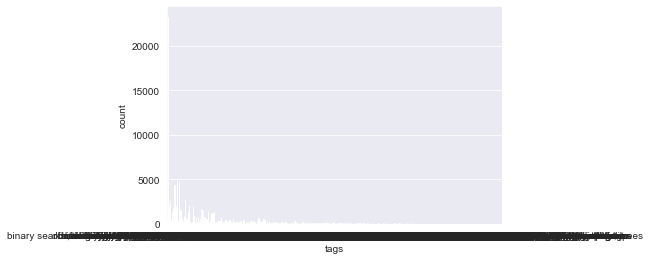

In [55]:
sns.countplot(x=df['tags'])

In [95]:
a = df.tags.apply(lambda x : x.split(',') if isinstance(x, str) else x )


In [142]:
a.shape,df.shape

((155295,), (155295, 16))

In [143]:
l = []
c = 0
for index,i in enumerate(a):
    if isinstance(i,list):
        for j in i:
            df[j] = 1
            if j  not in l:
                l.append(j)
        else:
            df[j] = 0
    else:
        c+=1
print(c)

15427


In [144]:
df.shape

(155295, 52)

In [117]:
', '.join(l)

'strings, brute force, dp, implementation, dfs and similar, trees, string suffix structures, greedy, sortings, data structures, constructive algorithms, combinatorics, dsu, graphs, flows, math, number theory, bitmasks, binary search, two pointers, shortest paths, geometry, divide and conquer, fft, chinese remainder theorem, *special, ternary search, graph matchings, games, hashing, probabilities, matrices, expression parsing, schedules, meet-in-the-middle, 2-sat'

In [118]:
df.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

## Points

<AxesSubplot:>

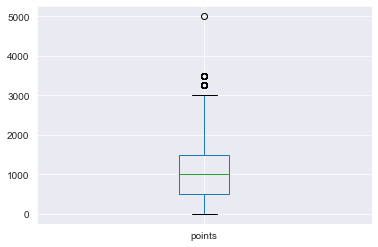

In [123]:
df.points.plot(kind='box')

<AxesSubplot:ylabel='Density'>

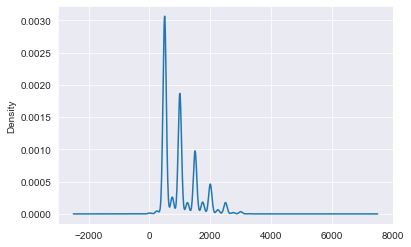

In [132]:
df.points.plot(kind='kde')

<AxesSubplot:xlabel='points', ylabel='Density'>

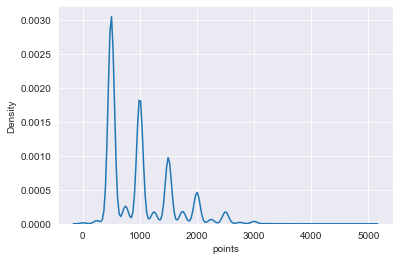

In [134]:
sns.kdeplot(df.points)

## Submission_count

In [178]:
df.submission_count.describe()

count    155295.000000
mean        372.235680
std         398.204943
min           1.000000
25%         118.000000
50%         237.000000
75%         480.000000
max        4570.000000
Name: submission_count, dtype: float64

<AxesSubplot:ylabel='Density'>

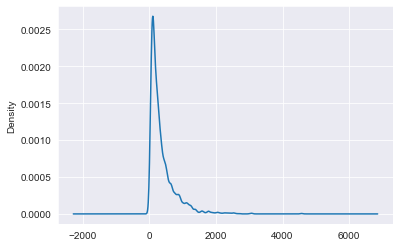

In [145]:
df.submission_count.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

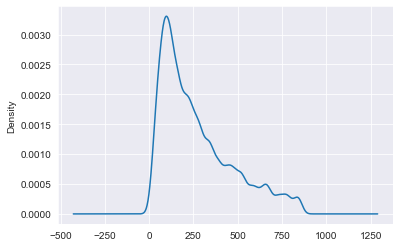

In [184]:
df[df.submission_count<df.submission_count.quantile(.90)].submission_count.plot(kind='kde')

<AxesSubplot:>

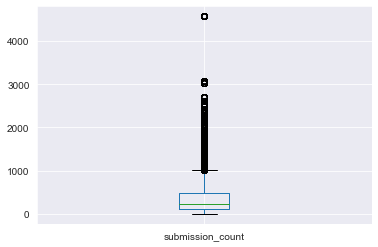

In [146]:
df.submission_count.plot(kind='box')

<AxesSubplot:xlabel='submission_count'>

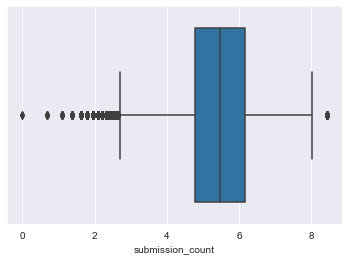

In [177]:
sns.boxplot(x=np.log(df.submission_count))

<AxesSubplot:xlabel='submission_count', ylabel='Density'>

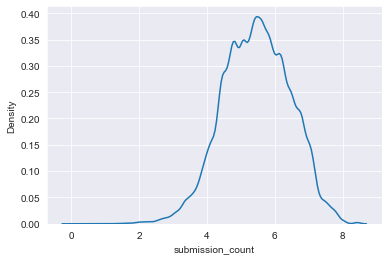

In [150]:
sns.kdeplot(x=np.log(df.submission_count))

## Problem solved

<AxesSubplot:ylabel='Density'>

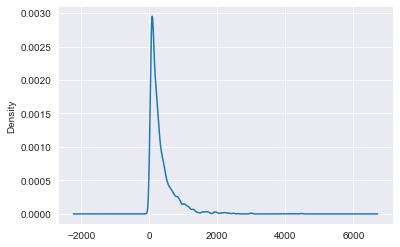

In [186]:
df.problem_solved.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

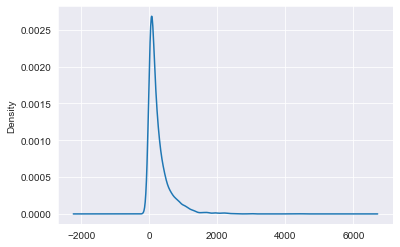

In [187]:
df_user.problem_solved.plot(kind='kde')

In [188]:
df.problem_solved.describe()

count    155295.000000
mean        336.078695
std         377.378519
min           1.000000
25%          99.000000
50%         209.000000
75%         428.000000
max        4476.000000
Name: problem_solved, dtype: float64

In [189]:
df_user.problem_solved.describe()

count    3571.000000
mean      267.894427
std       344.139688
min         0.000000
25%        53.000000
50%       146.000000
75%       349.000000
max      4476.000000
Name: problem_solved, dtype: float64

## Contribution

<AxesSubplot:>

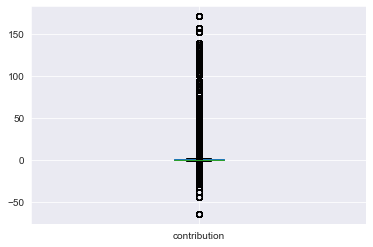

In [225]:
df.contribution.plot(kind='box') 

<AxesSubplot:ylabel='Density'>

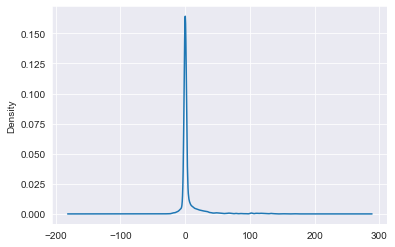

In [192]:
df.contribution.plot(kind='kde')

## Country

In [223]:
df.country.value_counts().shape

(79,)

<AxesSubplot:>

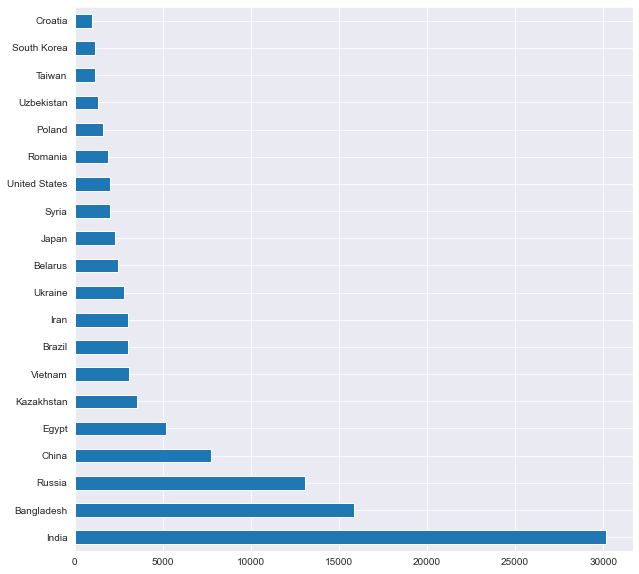

In [222]:
plt.figure(figsize=(10,10))
df.country.value_counts().iloc[:20].plot.barh()

## follower_count


<AxesSubplot:ylabel='Density'>

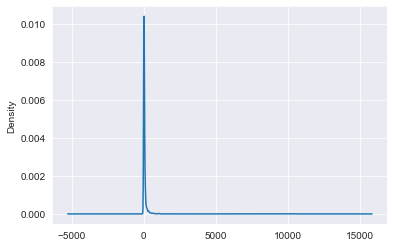

In [228]:
df.follower_count.plot(kind='kde')

<AxesSubplot:>

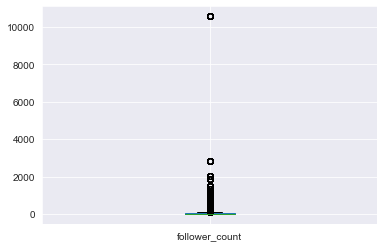

In [229]:
df.follower_count.plot(kind='box')

In [281]:
df[df.follower_count>df.follower_count.quantile(0.99957499967802)]

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,...,ternary search,graph matchings,games,hashing,probabilities,matrices,expression parsing,schedules,meet-in-the-middle,2-sat
106,user_1312,prob_69,1,D,2000.0,"chinese remainder theorem,math,number theory",934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
139,user_1312,prob_3334,2,B,1000.0,number theory,934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
1647,user_1312,prob_3434,1,E,2500.0,NaN,934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
1858,user_1312,prob_2605,2,A,500.0,"brute force,graphs,math",934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
2580,user_1312,prob_850,1,F,NaN,"combinatorics,math,number theory",934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146129,user_1312,prob_1612,3,E,2500.0,"data structures,greedy,two pointers",934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
150836,user_1312,prob_275,2,C,1000.0,"brute force,constructive algorithms,implementa...",934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
152215,user_1312,prob_1065,1,C,1750.0,"divide and conquer,dp",934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1
152459,user_1312,prob_2186,1,G,3250.0,"bitmasks,brute force,combinatorics,dp",934,909,171,Belarus,...,0,1,0,1,0,0,1,0,0,1


## last_online_time_seconds 

In [343]:
df['last_month_login']=df.last_online_time_seconds.apply(datetime.fromtimestamp).apply(lambda x : x.month)

<AxesSubplot:xlabel='last_month_login', ylabel='count'>

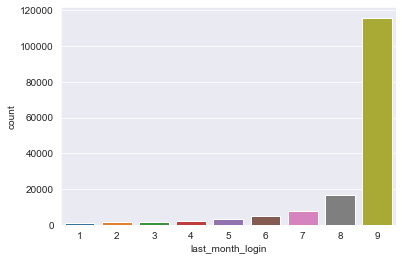

In [344]:
sns.countplot(x=df.last_month_login)

# Max rating

<AxesSubplot:ylabel='Density'>

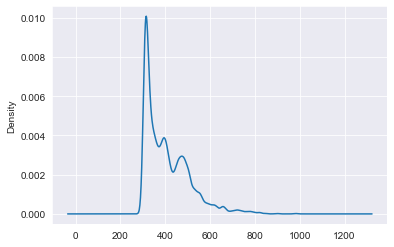

In [314]:
df.max_rating.plot(kind='kde')

In [315]:
df.max_rating.describe()

count    155295.000000
mean        407.525560
std          99.670629
min         303.899000
25%         323.394000
50%         383.028000
75%         468.463000
max         983.085000
Name: max_rating, dtype: float64

## rating


<AxesSubplot:>

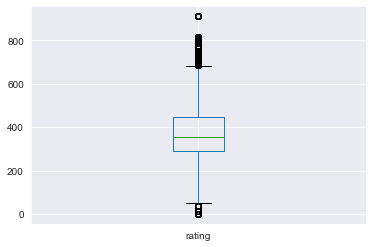

In [317]:
df.rating.plot(kind='box')

<AxesSubplot:ylabel='Density'>

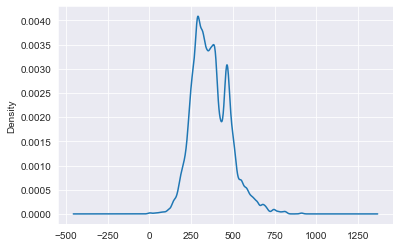

In [318]:
df.rating.plot(kind='kde')

In [319]:
df.rating.describe()

count    155295.000000
mean        368.623667
std         112.046565
min           0.000000
25%         288.131000
50%         356.078000
75%         445.814000
max         911.124000
Name: rating, dtype: float64

## rank


<AxesSubplot:xlabel='attempts_range', ylabel='count'>

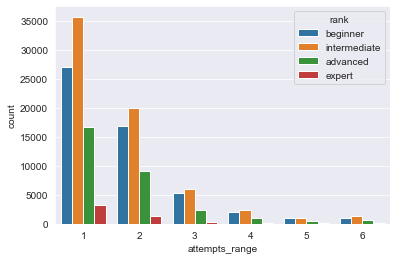

In [331]:
sns.countplot(hue=df['rank'], x=df.attempts_range)

<AxesSubplot:xlabel='rank', ylabel='count'>

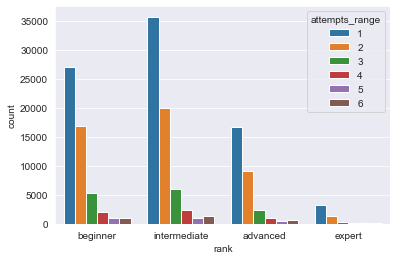

In [332]:
sns.countplot(x=df['rank'], hue=df.attempts_range)

# registration_time_seconds



In [338]:
df['registration_year']=df.registration_time_seconds.apply(datetime.fromtimestamp).apply(lambda x : x.year)

<AxesSubplot:xlabel='registration_year', ylabel='count'>

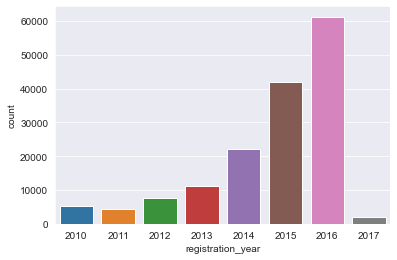

In [345]:
sns.countplot(x=df.registration_year)

## Checking level_type and points - are they correlated

<AxesSubplot:xlabel='level_type', ylabel='points'>

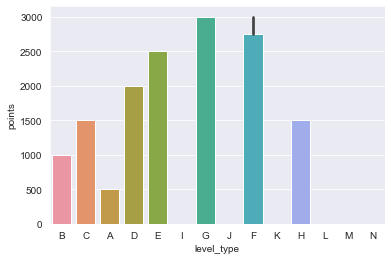

In [368]:
sns.barplot(x = df.level_type,y = df.points, estimator= np.median)

array([<AxesSubplot:ylabel='median'>, <AxesSubplot:ylabel='mean'>],
      dtype=object)

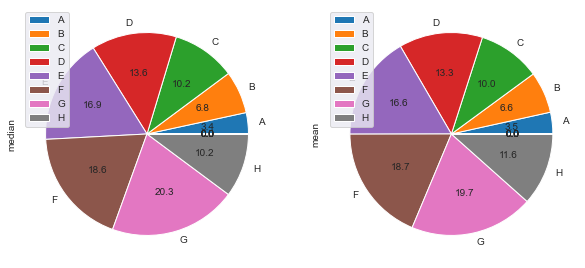

In [454]:
df.groupby('level_type').points.agg(['median', 'mean']).plot(kind='pie', subplots = True, figsize=(10,20), autopct='%.1f')

In [416]:
text=df.tags.dropna().str.split().explode().to_list()

In [408]:
from wordcloud import WordCloud


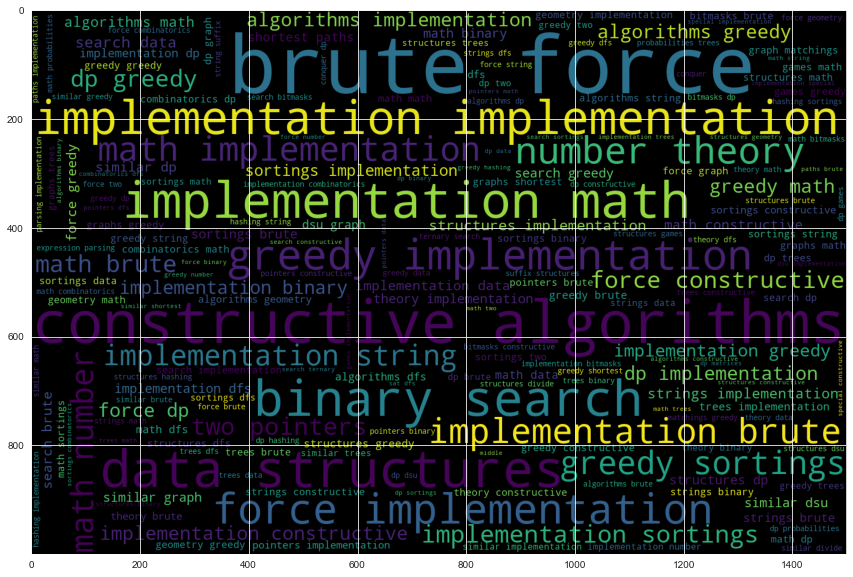

In [429]:
wc= WordCloud(width=1500, height=1000).generate(' '.join(text))
plt.figure(figsize=(15,10))
plt.imshow(wc)


In [431]:
from collections import Counter


In [439]:
dict(Counter(text))

{'strings': 666,
 'brute': 23392,
 'force,dp': 810,
 'implementation': 23275,
 'force,implementation': 5302,
 'dfs': 7489,
 'and': 12285,
 'similar,trees': 626,
 'dp,string': 33,
 'suffix': 392,
 'structures,trees': 644,
 'greedy,sortings': 2164,
 'greedy': 2632,
 'data': 8783,
 'structures': 2717,
 'force,constructive': 3819,
 'algorithms,implementation': 2515,
 'constructive': 13326,
 'algorithms,implementation,sortings': 87,
 'combinatorics': 253,
 'dsu,graphs,greedy': 119,
 'dp,flows,greedy': 23,
 'implementation,math,number': 1318,
 'theory': 7617,
 'algorithms,greedy': 1996,
 'bitmasks,graphs,math,trees': 10,
 'dp': 1213,
 'force,graphs,math': 650,
 'implementation,strings': 4317,
 'force,greedy': 1246,
 'algorithms,math': 2171,
 'binary': 12053,
 'search,data': 3039,
 'structures,two': 74,
 'pointers': 4432,
 'search,constructive': 146,
 'force': 2469,
 'implementation,number': 382,
 'implementation,math': 5096,
 'similar,dp': 80,
 'similar,graphs,implementation': 170,
 'search,

In [435]:
len(text), df.shape

(251651, (155295, 56))

## Problem solved vs rank

<AxesSubplot:xlabel='rank', ylabel='problem_solved'>

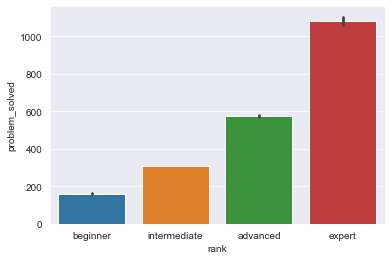

In [440]:
sns.barplot(x= df['rank'], y= df.problem_solved)

<AxesSubplot:xlabel='rating', ylabel='problem_solved'>

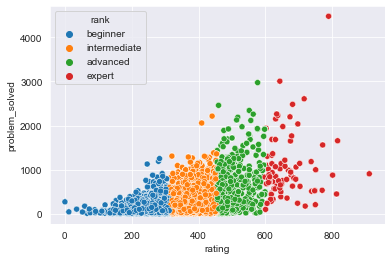

In [450]:
sns.scatterplot(hue= df['rank'],x=df.rating, y= df.problem_solved)

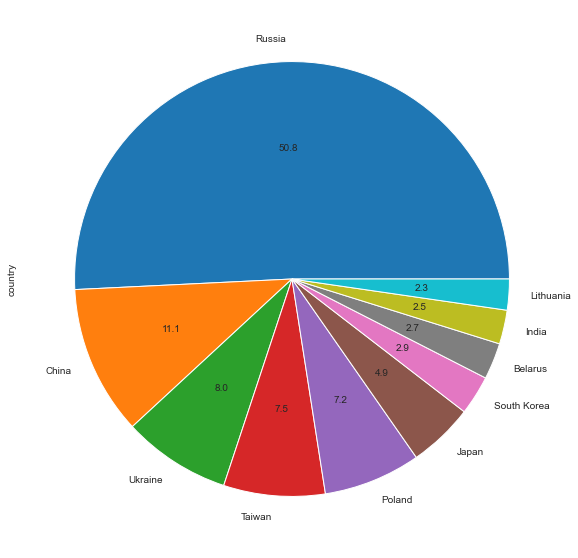

In [453]:
expert = df[['country','rank','level_type','attempts_range']][df['rank']=='expert']
exp = expert['country'].value_counts().head(10)
exp.plot.pie(y=exp.values, figsize=(10,10),autopct='%.1f')
plt.show()